## Google OCR API

 - 유료인듯..
 - 결재 진행해야 한다고 에러메세지가 출력되네여
 

In [16]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [9]:
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

# 입력 이미지 경로를 지정해 주세요.
path = '/home/aiffel/Downloads/image.png'

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

-rw-rw-r-- 1 aiffel aiffel 2335 10월  7 11:32 /home/aiffel/aiffel/ocr_python/my_google_api_key.json


PermissionDenied: 403 This API method requires billing to be enabled. Please enable billing on project #284650199985 by visiting https://console.developers.google.com/billing/enable?project=284650199985 then retry. If you enabled billing for this project recently, wait a few minutes for the action to propagate to our systems and retry.

![image.png](googleOCR.png)

## Keras OCR

In [2]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /home/aiffel/.keras-ocr/craft_mlt_25k.h5
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Looking for /home/aiffel/.keras-ocr/crnn_kurapan.h5


In [15]:
im=keras_ocr.tools.read(img_file_path)
pre=pipeline.recognize([im])

In [17]:
pre

[[('zitho2y',
   array([[270.,  18.],
          [342.,  18.],
          [342.,  39.],
          [270.,  39.]], dtype=float32)),
  ('celebl',
   array([[207.,  21.],
          [257.,  21.],
          [257.,  37.],
          [207.,  37.]], dtype=float32)),
  ('get',
   array([[19.585365, 24.268291],
          [49.548782, 20.939022],
          [51.280487, 36.524387],
          [21.31707 , 39.853657]], dtype=float32)),
  ('nearest',
   array([[ 57.644585,  24.048409],
          [124.80891 ,  21.649681],
          [125.32865 ,  36.20255 ],
          [ 58.16433 ,  38.601276]], dtype=float32)),
  ('face',
   array([[133.,  22.],
          [171.,  22.],
          [171.,  36.],
          [133.,  36.]], dtype=float32)),
  ('ch',
   array([[179.,  22.],
          [199.,  22.],
          [199.,  37.],
          [179.,  37.]], dtype=float32)),
  ('c',
   array([[254.,  22.],
          [264.,  22.],
          [264.,  36.],
          [254.,  36.]], dtype=float32)),
  ('ola',
   array([[ 96.,  51.],
 

In [8]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/image.png' 

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


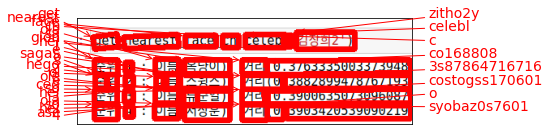

In [11]:
def keras_ocr_result(image_path):
    im=keras_ocr.tools.read(image_path)
    pre=pipeline.recognize([im])
    keras_ocr.tools.drawAnnotations(image=image_sample,predictions=prediction_sameple[0])

keras_ocr_result(img_file_path)

In [47]:
prediction_sameple=np.array(prediction_sameple)

In [54]:
prediction_sameple[0,:,0]

array(['zitho2y', 'celebl', 'get', 'nearest', 'face', 'ch', 'c', 'ola',
       'sa', 'glon', 'hei', 'co168808', '1', 'o', 'e', 'sagas', 's',
       'hego', '3s87864716716', '2', 'ol', 'ole', 'e', 'ced', 'so', 'hei',
       'costogss170601', '3', 'ola', 'so', 'hei', 'ase', 'o',
       'syobaz0s7601', '4'], dtype=object)

## Tesseract OCR

In [33]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/image.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

In [18]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/image.png'

In [20]:
custom_oem_psm_config = r'--oem 3 --psm 3'
image = Image.open(img_file_path)

recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT)
    

In [55]:
np.array(recognized_data['text'])

array(['', '', '', '', ':', '96', '068「25', '트', '7006', '대', "06166('",
       '김', '창', '희', "2'", ')', '', '', '', ' ', '   ', '', '', '', '순위',
       '1', ':', '이', '름', '(', '옥', '냥이),', '거', '리',
       "(0.3763335003373948'", '', '순위', '2', ':', '이', '름', '(', '스',
       '윙', '스', '),', '거', '리', '(0.3882899478767193:', '', '순위', '3',
       '：', '이', '름', '(', '류', '준', '열', ')', ',', '거', '리',
       "(0.3900635073096087'", '', '순위', '4', '：', '이', '름', '(서장훈),',
       '거', '리', "(0.3903420539090219'"], dtype='<U20')

## 결과
#### 1. Google API의 경우 유료라서 사용이 불가능하다... 웹에서 직접 실행시켜 보았을 때, 결과가 가장 좋아보인다.

#### 2. kaggle 의 경우 한글을 지원 안해서 그런지, 아예 인식을 못한다.

#### 3. Tesseract OCR은 한글을 지원하기는 하나, 인식정확도가 매우 떨어지는 듯 하다.